11490434/11490434 [==============================] - 0s 0us/step
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 flatten (Flatten)           (None, 784)                  0         ['input_1[0][0]']             
                                                                                                  
 dense (Dense)               (None, 512)                  401920    ['flatten[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 256)                  131328    ['dense[0][0]']               
                           

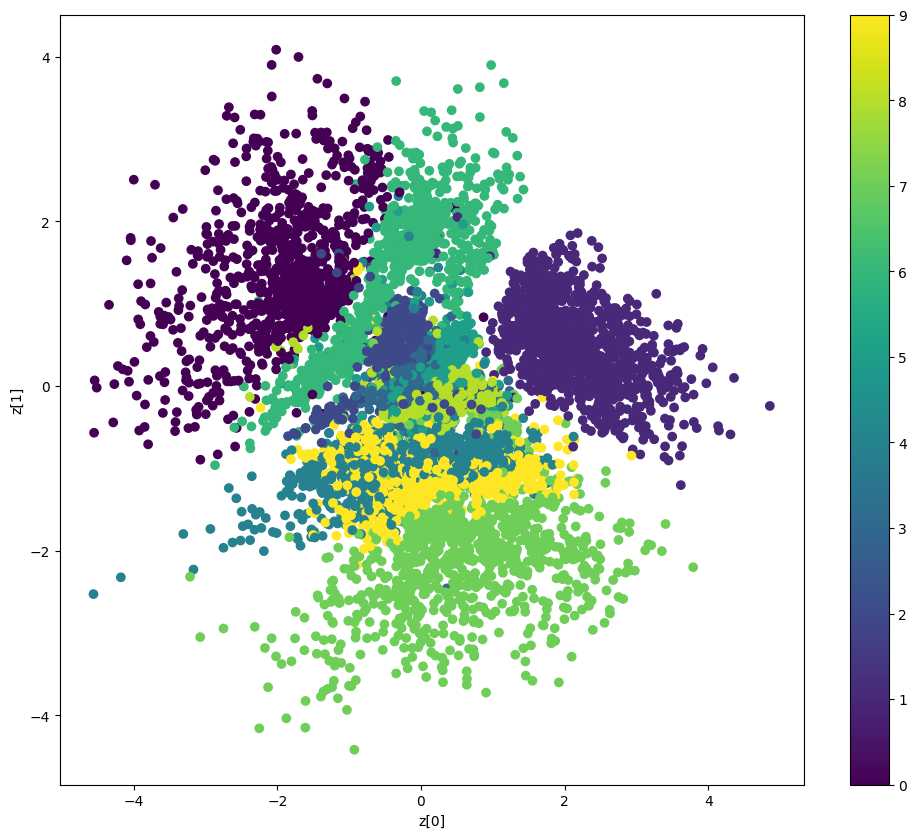

1/1 [==============================] - 0s 21ms/step


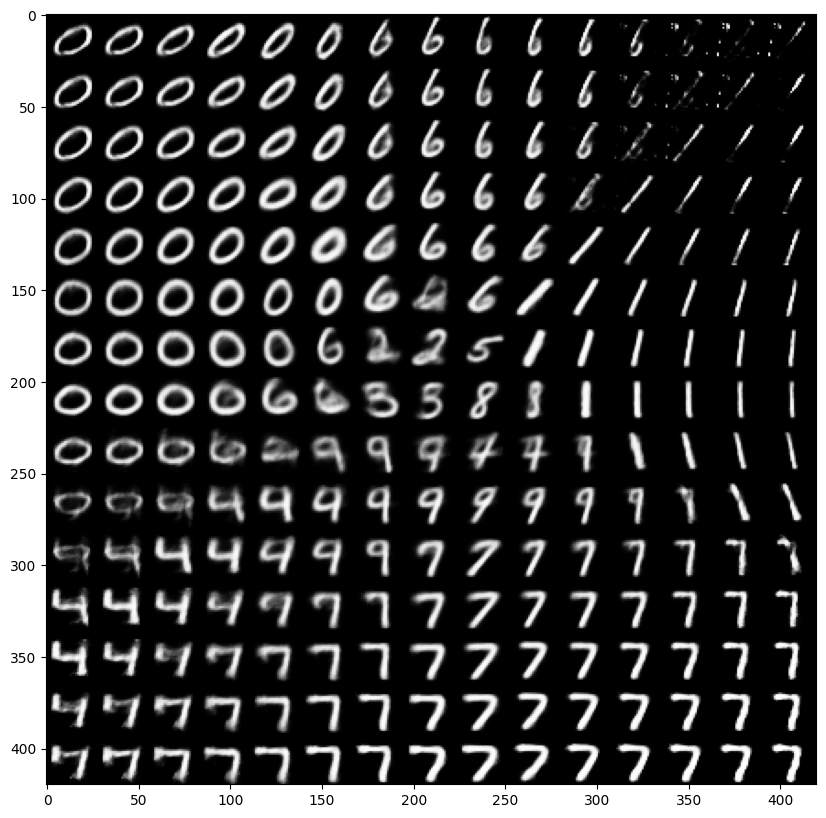

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
input_shape = (28, 28, 1)
batch_size = 128
latent_dim = 2  # Dimensiones del espacio latente
epochs = 50

# Cargar y preprocesar los datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype('float32') / 255
x_test = np.expand_dims(x_test, -1).astype('float32') / 255

# Construcción del encoder
inputs = Input(shape=input_shape)
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# Construcción del decoder
latent_inputs = Input(shape=(latent_dim,))
x = Dense(256, activation='relu')(latent_inputs)
x = Dense(512, activation='relu')(x)
x = Dense(np.prod(input_shape), activation='sigmoid')(x)
outputs = Reshape(input_shape)(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# Construcción del VAE
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

# Definición de la pérdida
reconstruction_loss = binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
reconstruction_loss *= np.prod(input_shape)
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

# Compilación y entrenamiento del VAE
vae.compile(optimizer='adam')
vae.summary()
vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

# Generación de nuevas imágenes
def plot_results(models, data, batch_size=128, model_name="vae_mnist"):
    encoder, decoder = models
    x_test, y_test = data
    z_mean, _, _ = encoder.predict(x_test, batch_size=batch_size)

    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

    n = 15
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = np.expand_dims(x_test, -1).astype('float32') / 255
models = (encoder, decoder)
data = (x_test, y_test)
plot_results(models, data)


In [2]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.6 MB/s eta 0:00:00


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 flatten_1 (Flatten)         (None, 784)                  0         ['input_3[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 512)                  401920    ['flatten_1[0][0]']           
                                                                                                  
 dense_8 (Dense)             (None, 256)                  131328    ['dense_7[0][0]']             
                                                                                            

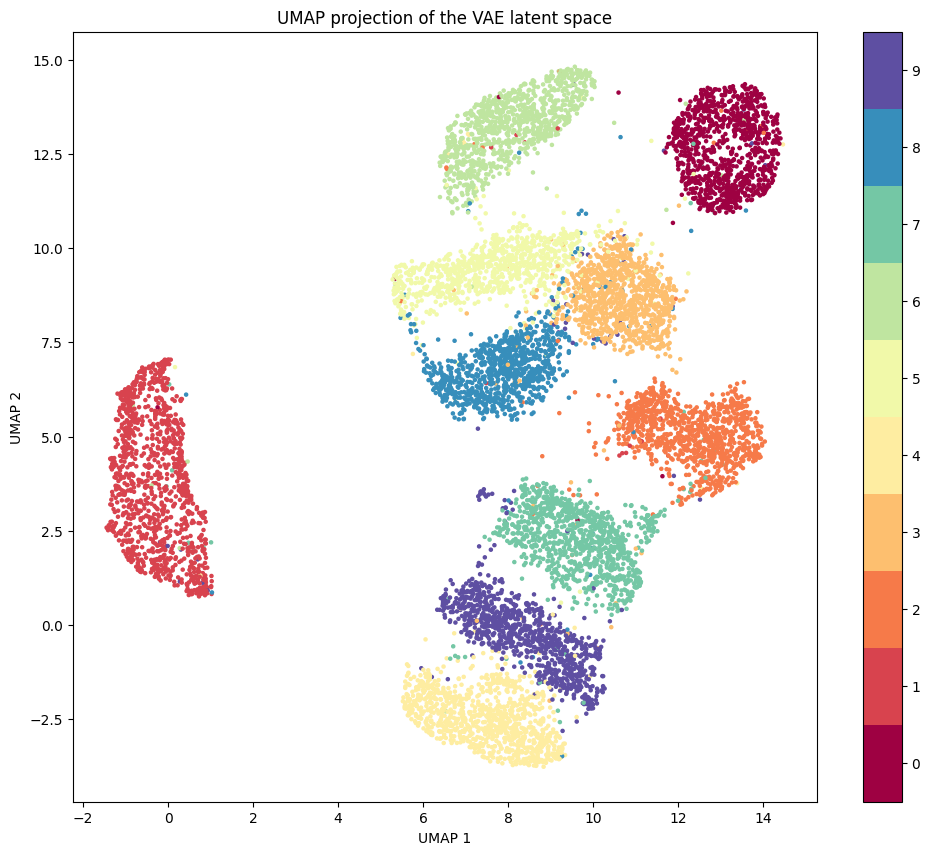

In [3]:
 import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import umap

# Parámetros del modelo
input_shape = (28, 28, 1)
batch_size = 128
latent_dim = 20  # Cambiado a 20 dimensiones
epochs = 50

# Cargar y preprocesar los datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype('float32') / 255
x_test = np.expand_dims(x_test, -1).astype('float32') / 255

# Construcción del encoder
inputs = Input(shape=input_shape)
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# Construcción del decoder
latent_inputs = Input(shape=(latent_dim,))
x = Dense(256, activation='relu')(latent_inputs)
x = Dense(512, activation='relu')(x)
x = Dense(np.prod(input_shape), activation='sigmoid')(x)
outputs = Reshape(input_shape)(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# Construcción del VAE
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

# Definición de la pérdida
reconstruction_loss = binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
reconstruction_loss *= np.prod(input_shape)
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_mean(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

# Compilación y entrenamiento del VAE
vae.compile(optimizer='adam')
vae.summary()
vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

# Aplicar UMAP para reducir la dimensionalidad del espacio latente
z_mean, _, _ = encoder.predict(x_test, batch_size=batch_size)
umap_model = umap.UMAP(n_neighbors=30, min_dist=0.3, metric='correlation')
z_umap = umap_model.fit_transform(z_mean)

# Visualizar las representaciones latentes reducidas con UMAP
plt.figure(figsize=(12, 10))
plt.scatter(z_umap[:, 0], z_umap[:, 1], c=y_test, cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the VAE latent space')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()
